## 선형회귀 과제
## 자동차의 특성을 통해 연비 (mpg(miles per gallon)) 예측

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. 데이터 불러오기

In [ ]:
# 데이터 출처: https://archive.ics.uci.edu/ml/datasets/auto+mpg

col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# 주요 컬럼: 
# mpg: mile per gallon 연비
# horsepower: 마력
# weight: 무게
# origin: 제조국 (1: USA, 2: Europe, 3: Asia)

# comma가 아니라 whitespace로 컬럼 분리, ? 값는 결측치로 처리함
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=col_names, na_values='?') 
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
np.sum(df.isna()) # isna함수를 사용하여 horsepower 변수에만 6개의 null값이 있는 것 확인 가능

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

# 2. 데이터의 이해

## 2.1 Null값이 하나라도 들어있는 행 제거 
- 모든 행의 non-null 개수가 같아져야 함
- np.sum(df.isna())을 통해 null이 있는 변수가 없다는 것 확인

In [ ]:
df.dropna(inplace=True)

In [ ]:
np.sum(df.isna())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

## 2.2 연비(MPG)의 분포는?
- 히스토그램과 Boxplot으로 표현하기 
- 연비가 낮은 차들이 연비가 높은 차들보다 많이 있는 것을 시각적으로 확인할 수 있음

Text(0, 0.5, 'Frequency')

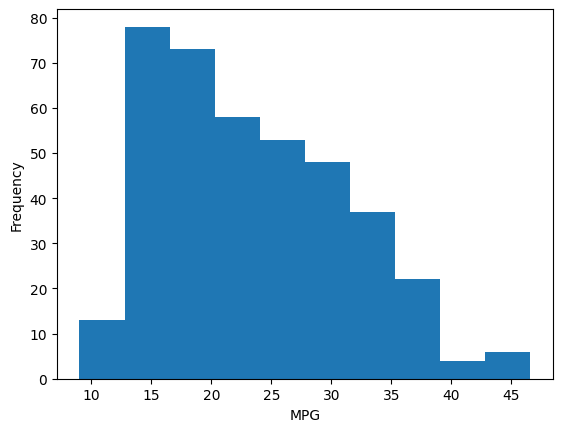

In [ ]:
plt.hist(df['mpg'])
plt.xlabel('MPG')
plt.ylabel('Frequency')

Text(0, 0.5, 'MPG')

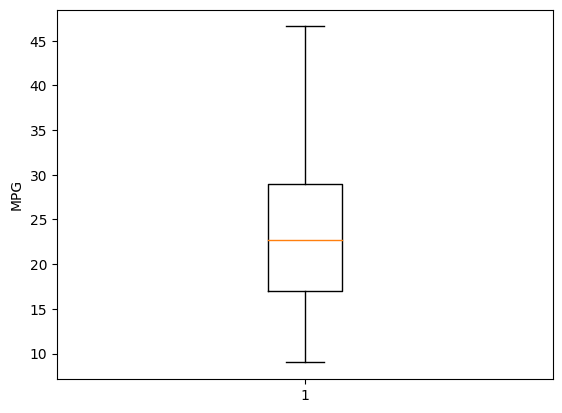

In [ ]:
plt.boxplot(df['mpg'])
plt.ylabel('MPG')

## 2.3 제조국(Origin)에 따른 연비 평균은? 
- Origin에서 1: USA, 2: Europe, 3: Asia

In [ ]:
mpgs = df.groupby('origin').mean()['mpg']
mpgs

<ipython-input-9-ff11bcc4a8dd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpgs = df.groupby('origin').mean()['mpg']


origin
1    20.033469
2    27.602941
3    30.450633
Name: mpg, dtype: float64

Text(0, 0.5, 'MPG (mean)')

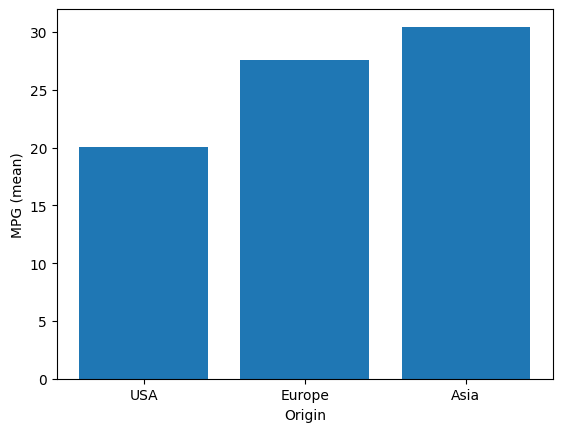

In [ ]:
plt.bar(['USA', 'Europe', 'Asia'], mpgs)
plt.xlabel('Origin')
plt.ylabel('MPG (mean)')

## 2.4 차의 무게(Weight)와 연비(MPG)의 관계는?
- Scatter plot과 상관계수 구하기 

Text(0, 0.5, 'MPG')

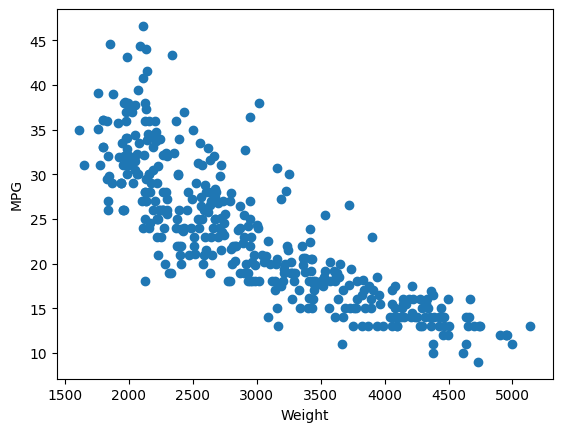

In [ ]:
plt.scatter(df['weight'], df['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')

In [ ]:
np.corrcoef(df['weight'], df['mpg'])

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

## 2.5 마력(Horsepower)과 연비(MPG)의 관계는?
- Scatter plot과 상관계수 구하기 

Text(0, 0.5, 'Weight')

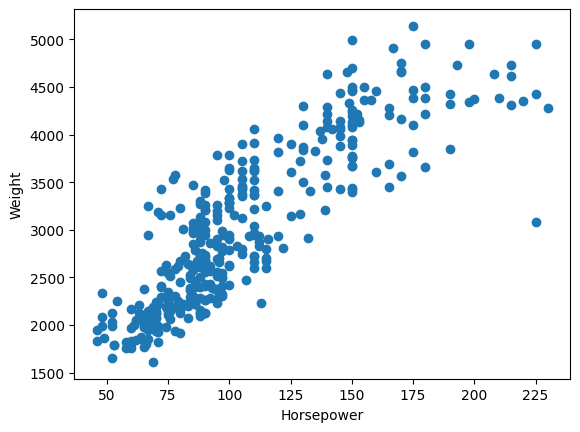

In [ ]:
plt.scatter(df['horsepower'], df['weight'])
plt.xlabel('Horsepower')
plt.ylabel('Weight')

In [ ]:
np.corrcoef(df['horsepower'], df['weight'])

array([[1.        , 0.86453774],
       [0.86453774, 1.        ]])

# 3. 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 3.1 출시연도("Model Year")와 제조국("Origin")을 One-hot encoding으로 변환

In [ ]:
df_enc = pd.get_dummies(df, columns=['model_year', 'origin'])
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         392 non-null    float64
 5   acceleration   392 non-null    float64
 6   car_name       392 non-null    object 
 7   model_year_70  392 non-null    uint8  
 8   model_year_71  392 non-null    uint8  
 9   model_year_72  392 non-null    uint8  
 10  model_year_73  392 non-null    uint8  
 11  model_year_74  392 non-null    uint8  
 12  model_year_75  392 non-null    uint8  
 13  model_year_76  392 non-null    uint8  
 14  model_year_77  392 non-null    uint8  
 15  model_year_78  392 non-null    uint8  
 16  model_year_79  392 non-null    uint8  
 17  model_year_80  392 non-null    uint8  
 18  model_year

## 3.2 Input 데이터(X)와 Target 데이터(y) 분리

In [ ]:
# df_enc에서 'car_name'과 'mpg'를 제외한 컬럼들만 X에 대입
# df_enc에서 'mpg'만 y에 대입


# X.shape, y.shape 출력 결과 아래와 같음

((392, 21), (392,))

## 3.3 Train set 과 Test set으로 분리
- test set에 30%의 데이터 포함 
- X_train, X_test, y_train, y_test로 구분

In [ ]:
# test set의 비율을 0.3, random_state=0으로
# X_train.shape, X_test.shape, y_train.shape, y_test.shape <= 결과는 아래와 같음

((274, 21), (118, 21), (274,), (118,))

## 3.4 자동차 무게(Weight)를 통해 연비(MPG) 예측하기 
- 선형회귀 모델 만들기
- MAE와 $R^2$로 평가
- 무게와 연비를 그래프로 표현하고, 선형회귀 예측 결과를 시각화

In [ ]:
# 아래와 같이 학습됨
print('w_0: ', reg.intercept_)
print('w_1: ', reg.coef_)

w_0:  46.254041172147396
w_1:  [-0.00770724]


In [ ]:
# 평가 결과
print('MAE: ', mean_absolute_error(y_test, y_pred),' R_squared: ', r2_score(y_test, y_pred))

MAE:  3.405889347991332  R_squared:  0.6644440345914269


Text(0, 0.5, 'MPG')

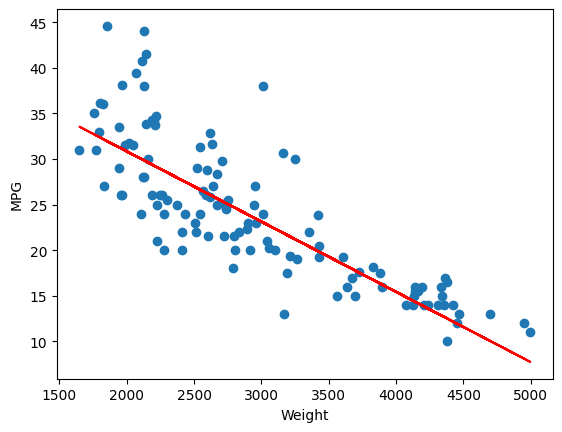

In [ ]:
# 아래와 같이 시각화

## 3.5 두개 이상의 변수를 사용하여 선형회귀 3.4보다 성능이 좋은 모델 만들기 
- 성능이 좋은 기준: MAE가 더 작고 $R^2$가 더 큼
- MAE와 $R^2$로 평가

In [ ]:
# 모델 학습 결과
print('w_0: ', reg.intercept_)
print('w_1: ', reg.coef_)

w_0:  45.841847958065685
w_1:  [-0.04107628 -0.00613322]


In [ ]:
# 3.4보다 성능이 좋은 모델이 나오기만 하면 됨
print('MAE: ', mean_absolute_error(y_test, y_pred),' R_squared: ', r2_score(y_test, y_pred))

MAE:  3.3330095304607315  R_squared:  0.6834117333600405
